# Summary
This Script pulls data from the pilot

In [146]:
# load libraries and initialize database cursor
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = pymysql.connect(
    host="thirdtest.camwsondhmqr.us-east-2.rds.amazonaws.com",
    user="thirdtest",
    passwd="Qja1998+0325",
    db="ebdb"
)
cursor = conn.cursor()

In [147]:
# pull data from database and print user data
cursor.execute('SELECT * FROM user');
rows = cursor.fetchall()

df_users = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_users.rename(
    columns={0:'Name', 1:'Political Stance', 2:'Session', 3:'Question Order', 4:'Current Question', 5:'World'},
    inplace=True
)
#df_users = df_users.sort_values(['Name'], ascending=[1])
df_users['Turn'] = range(1,len(df_users)+1)
df_users = df_users[['Turn','Name','Political Stance','Session', 'Question Order', 'World']]
df_users

,Turn,Name,Political Stance,Session,Question Order,World
0,1,A19L8SNH73AX1Z,Republicans,5b8b4044824d7,"23,24,14,6,2,18,21,13,12,8,3,5,20,15,7,4,22,1,...",2
1,2,AEO8NL8D28NQG,strong Democrats,5b8b4d86a9b32,"23,24,2,4,18,7,21,10,8,9,3,14,17,6,12,11,22,19...",2
2,3,A3302168IZJTMX,Democrats,5b8b568322aea,"23,24,3,7,20,9,21,17,6,16,12,10,1,8,19,4,22,5,...",2
3,4,A2A14Q1JLWW6R1,strong Democrats,5b8b7fcb9fc24,"23,24,20,17,10,12,21,5,9,14,6,15,13,8,16,3,22,...",2
4,5,A10G0V9R0U5OR,Democrats,5b8b863661d5f,"23,24,2,18,12,20,21,7,3,19,8,15,6,13,14,5,22,9...",2


In [148]:
# make user-question data in long format
cursor.execute('SELECT * FROM user_question_world_answer WHERE world_id != 1');
rows = cursor.fetchall()

df_responses = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_responses.rename(
    columns={0:'Name', 1:'World', 2:'Question', 3:'Response'},
    inplace=True
)

# Construct and print fully wide one-hot-coded dataframe
df_responses_full = df_responses
df_responses_full = pd.merge(df_responses_full, df_users)

df_responses_full = df_responses_full.drop(["Question Order", "Session"], axis=1)
df_responses_full = df_responses_full.rename(columns={
    "Political Stance":"Political Stance Full",
    4:"Party Predict",
    5:"See Priors"})

df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Full"]
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Democrats", "Democrats")
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Republicans", "Republicans")

df_responses_full["Response"] = df_responses_full["Response"].replace("support", 1)
df_responses_full["Response"] = df_responses_full["Response"].replace("oppose", 0)

df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Democrats", 1)
df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Republicans", 0)

print('Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes')
df_responses_full

Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes


,Name,World,Question,Response,Party Predict,See Priors,Turn,Political Stance Full,Political Stance Binary
0,A19L8SNH73AX1Z,2,23,1.0,0,1,1,Republicans,Republicans
1,A19L8SNH73AX1Z,2,24,0.0,1,1,1,Republicans,Republicans
2,A19L8SNH73AX1Z,2,14,1.0,0,0,1,Republicans,Republicans
3,A19L8SNH73AX1Z,2,6,1.0,0,1,1,Republicans,Republicans
4,A19L8SNH73AX1Z,2,2,0.0,1,1,1,Republicans,Republicans
5,A19L8SNH73AX1Z,2,18,0.0,0,1,1,Republicans,Republicans
6,A19L8SNH73AX1Z,2,21,1.0,0,1,1,Republicans,Republicans
7,A19L8SNH73AX1Z,2,13,1.0,0,1,1,Republicans,Republicans
8,A19L8SNH73AX1Z,2,12,1.0,0,1,1,Republicans,Republicans
9,A19L8SNH73AX1Z,2,8,0.0,1,1,1,Republicans,Republicans


## Bug Checks

In [149]:
# bug check: how many "ghost" pages
print('# "ghost" pages:', len(df_responses[df_responses['Name'] == '']))
df_responses[df_responses['Name'] == '']

# "ghost" pages: 0


,Name,World,Question,Response,4,5


## Manipulation Checks

In [150]:
# manipulation check: who didn't want to see others' responses
print('# "do not see prior responses" selections:', len(df_responses[df_responses[5] == '0']))
df_responses[df_responses[5] == '0']

# "do not see prior responses" selections: 64


,Name,World,Question,Response,4,5
2,A19L8SNH73AX1Z,2,14,support,Republicans,0
24,AEO8NL8D28NQG,2,23,oppose,Republicans,0
25,AEO8NL8D28NQG,2,24,support,Democrats,0
26,AEO8NL8D28NQG,2,2,support,Democrats,0
27,AEO8NL8D28NQG,2,4,oppose,Republicans,0
28,AEO8NL8D28NQG,2,18,support,Republicans,0
29,AEO8NL8D28NQG,2,7,oppose,Republicans,0
30,AEO8NL8D28NQG,2,21,oppose,Republicans,0
31,AEO8NL8D28NQG,2,10,support,Republicans,0
32,AEO8NL8D28NQG,2,8,support,Republicans,0


## Polarization

Responses by Question by Group:
                                   Response
Question Political Stance Binary          
1        Democrats                0.000000
         Republicans              0.000000
2        Democrats                0.666667
         Republicans              0.000000
3        Democrats                0.250000 


Patry Predictions by Question by Group:
                                   Party Predict
Question Political Stance Binary               
1        Democrats                         0.25
         Republicans                       1.00
2        Democrats                         1.00
         Republicans                       1.00
3        Democrats                         0.50 




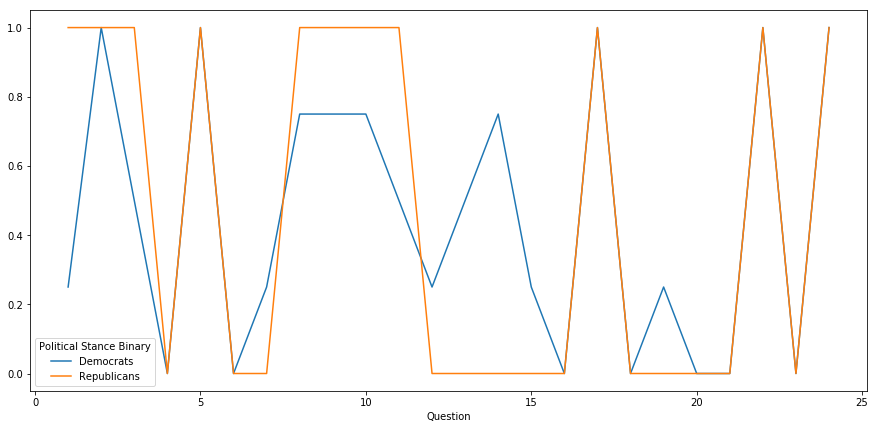

In [167]:
# Construct fully wide dataframe with binarized political stance variable
df_pol = df_responses_full.groupby(['Question', 'Political Stance Binary']).mean()
df_pol = df_pol.drop(["World","Turn"], axis=1)

df_pol_response = df_pol.drop(["Party Predict"], axis=1)
print("Responses by Question by Group:\n", df_pol_response.head(),'\n\n')

df_pol_partypredict = df_pol.drop(["Response"], axis=1)
print("Patry Predictions by Question by Group:\n", df_pol_partypredict.head(), '\n\n')


fig, ax = plt.subplots(figsize=(15,7))
df_pol.groupby(['Question','Political Stance Binary']).mean()['Party Predict'].unstack().plot(ax=ax)

## Data carpentry

In [20]:
# print user-question data in wide format
#df_responses = df_responses.sort_values(['Name'], ascending=[1])
df_responses = df_responses.pivot(index='Name', columns='Question', values='Response')

df_users.set_index('Name').join(df_responses).sort_values('Turn')

,Turn,Political Stance,Session,Question Order,World,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
Name,,,,,,,,,,,,,,,,,,,,,
A19L8SNH73AX1Z,1,Republicans,5b8b4044824d7,"23,24,14,6,2,18,21,13,12,8,3,5,20,15,7,4,22,1,...",2,oppose,oppose,oppose,support,oppose,...,support,support,oppose,oppose,support,support,support,oppose,support,oppose
AEO8NL8D28NQG,2,strong Democrats,5b8b4d86a9b32,"23,24,2,4,18,7,21,10,8,9,3,14,17,6,12,11,22,19...",2,oppose,support,support,oppose,oppose,...,oppose,oppose,support,support,oppose,support,oppose,support,oppose,support
A3302168IZJTMX,3,Democrats,5b8b568322aea,"23,24,3,7,20,9,21,17,6,16,12,10,1,8,19,4,22,5,...",2,oppose,oppose,oppose,support,support,...,support,support,oppose,None,oppose,oppose,oppose,oppose,oppose,support
A2A14Q1JLWW6R1,4,strong Democrats,5b8b7fcb9fc24,"23,24,20,17,10,12,21,5,9,14,6,15,13,8,16,3,22,...",2,oppose,None,oppose,oppose,oppose,...,oppose,oppose,oppose,oppose,support,support,oppose,support,oppose,support
A10G0V9R0U5OR,5,Democrats,5b8b863661d5f,"23,24,2,18,12,20,21,7,3,19,8,15,6,13,14,5,22,9...",2,oppose,support,oppose,oppose,support,...,support,None,oppose,oppose,support,support,support,support,oppose,support


## Write out and save data

In [266]:
# write out and save user-question data to .csv
df_users.set_index('Name').join(df_responses).sort_values('Turn').to_csv('pilot_data.csv')